# Introduction:

- This data shows the mass shooting in America for the past 51 years (1966 - 2017)
- Three hundred and twenty mass shooting are included in this dataset with 1400 fatalities and 1972 people injured during these attacks.
- This analysis is broken up to look at days, months, and years. As well as what days mass shooting occur on. 
- Finally, the analysis looks at fatalities and people injured in relation to the year.

In [67]:
#Load libraries
library(ggplot2)
library(stringr)
library(plyr)
library(lubridate)
library(dplyr)
library(forcats)
library(lattice)

Data mass shooting in the United states since 1966 to 2017.

https://www.kaggle.com/zusmani/us-mass-shootings-last-50-years/downloads/Mass%20Shootings%20Dataset%20Ver%204.csv

In [68]:
#Load data
mass <- read.csv("/home/james/Downloads/Mass Shootings Dataset Ver 5.csv", header = TRUE)

In [69]:
#fix dates
mass$Date <- as.Date(paste(mass$Date), "%m/%d/%Y")

In [70]:
head(mass)

S.,Title,Location,Date,Incident.Area,Open.Close.Location,Target,Cause,Summary,Fatalities,⋯,Total.victims,Policeman.Killed,Age,Employeed..Y.N.,Employed.at,Mental.Health.Issues,Race,Gender,Latitude,Longitude
1,Texas church mass shooting,"Sutherland Springs, TX",2017-11-05,Church,Close,random,unknown,"Devin Patrick Kelley, 26, an ex-air force officer, shot and killed 26 people and wounded 20 at a church in Texas. He was found dead later in his vehicle.",26,⋯,46,0,26,NA,,No,White,M,NA,NA
2,Walmart shooting in suburban Denver,"Thornton, CO",2017-11-01,Wal-Mart,Open,random,unknown,"Scott Allen Ostrem, 47, walked into a Walmart in a suburb north of Denver and fatally shot two men and a woman, then left the store and drove away. After an all-night manhunt, Ostrem, who had financial problems but no serious criminal history, was captured by police after being spotted near his apartment in Denver.",3,⋯,3,0,47,NA,,No,White,M,NA,NA
3,Edgewood businees park shooting,"Edgewood, MD",2017-10-18,Remodeling Store,Close,coworkers,unknown,"Radee Labeeb Prince, 37, fatally shot three people and wounded two others around 9am at Advance Granite Solutions, a home remodeling business where he worked near Baltimore. Hours later he shot and wounded a sixth person at a car dealership in Wilmington, Delaware. He was apprehended that evening following a manhunt by authorities.",3,⋯,6,0,37,NA,Advance Granite Store,No,Black,M,NA,NA
4,Las Vegas Strip mass shooting,"Las Vegas, NV",2017-10-01,Las Vegas Strip Concert outside Mandala Bay,Open,random,unknown,"Stephen Craig Paddock, opened fire from the 32nd floor of Manadalay Bay hotel at Last Vegas concert goers for no obvious reason. He shot himself and died on arrival of law enforcement agents. He was 64",59,⋯,585,1,64,NA,,Unclear,White,M,36.18127,-115.1341
5,San Francisco UPS shooting,"San Francisco, CA",2017-06-14,UPS facility,Close,coworkers,,"Jimmy Lam, 38, fatally shot three coworkers and wounded two others inside a UPS facility in San Francisco. Lam killed himself as law enforcement officers responded to the scene.",3,⋯,5,0,38,1,,Yes,Asian,M,NA,NA
6,Pennsylvania supermarket shooting,"Tunkhannock, PA",2017-06-07,Weis grocery,Close,coworkers,terrorism,"Randy Stair, a 24-year-old worker at Weis grocery fatally shot three of his fellow employees. He reportedly fired 59 rounds with a pair of shotguns before turning the gun on himself as another co-worker fled the scene for help and law enforcement responded.",3,⋯,3,NA,24,1,Weis grocery,Unclear,White,M,NA,NA


# Incident Of Mass shooting based on Dates

Next, we will look at the relationship between the dates and days that mass murders are carried out on. Therefore, is there an increase in the number of mass shooting over the past 50 years. Looking at the number each. Secondly, we will look at whether there is a significant relationship between the months that mass shooting is likely to occur and finally the day of the month.

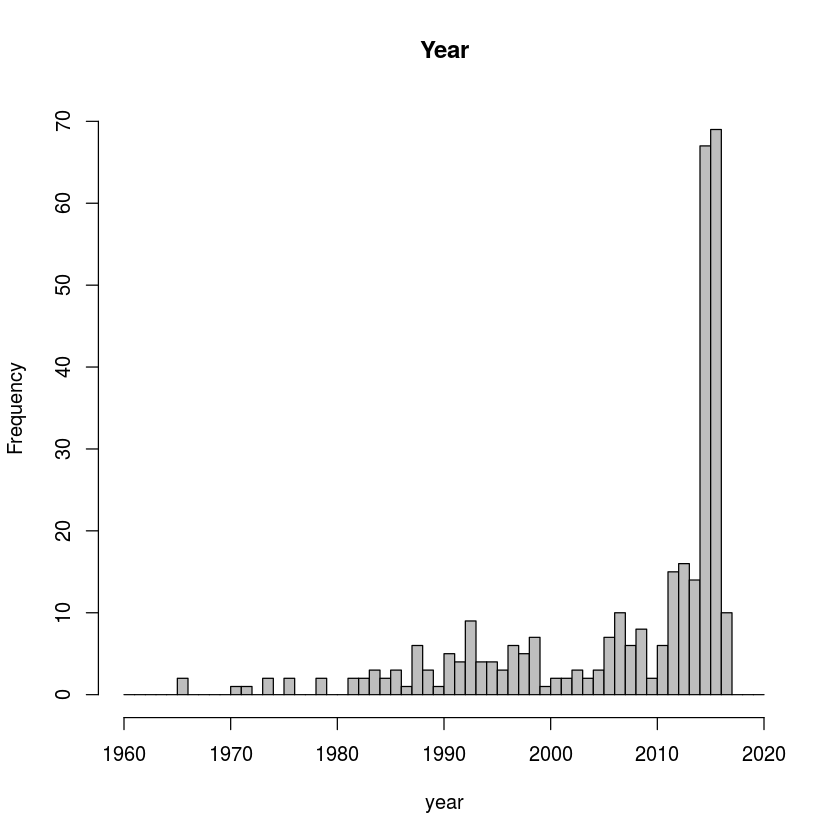

In [71]:
year <- str_sub(mass$Date,1, 4)
year <- as.numeric(year)
years <- c(1960:2020)
hist(year, 
     col = "grey", 
     main = "Year",
     ylim = c(0, 70),
     breaks = years)

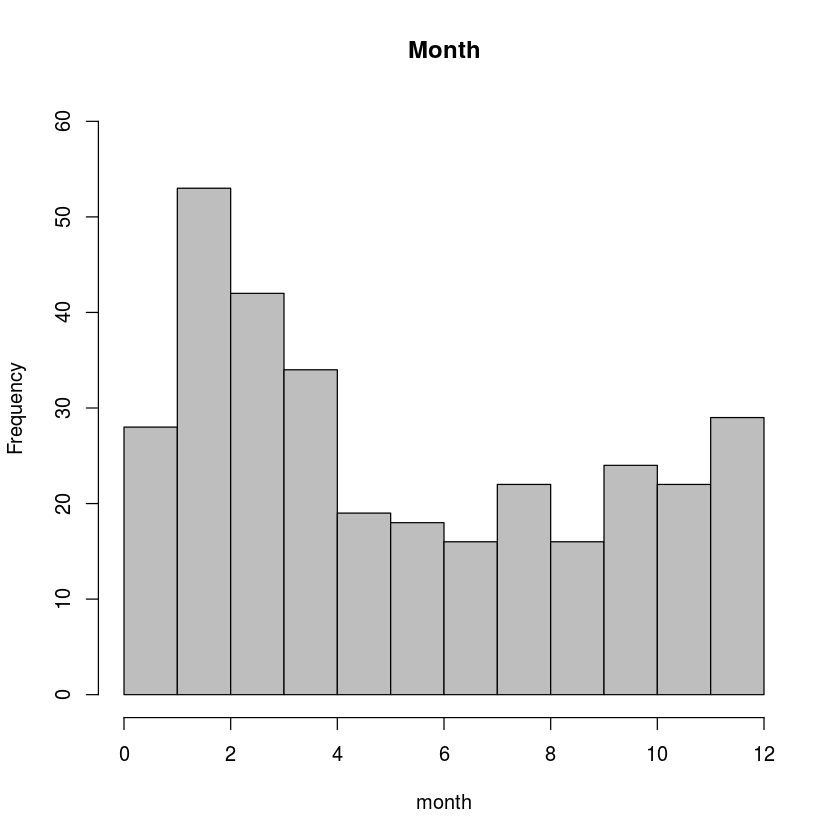

In [72]:
#Month
month <- str_sub(mass$Date, 6, 7)
month <- as.numeric(month)
months <- c(0:12)
hist(month, 
     col = "grey", 
     main = "Month",
     ylim = c(0, 60),
     breaks=months)

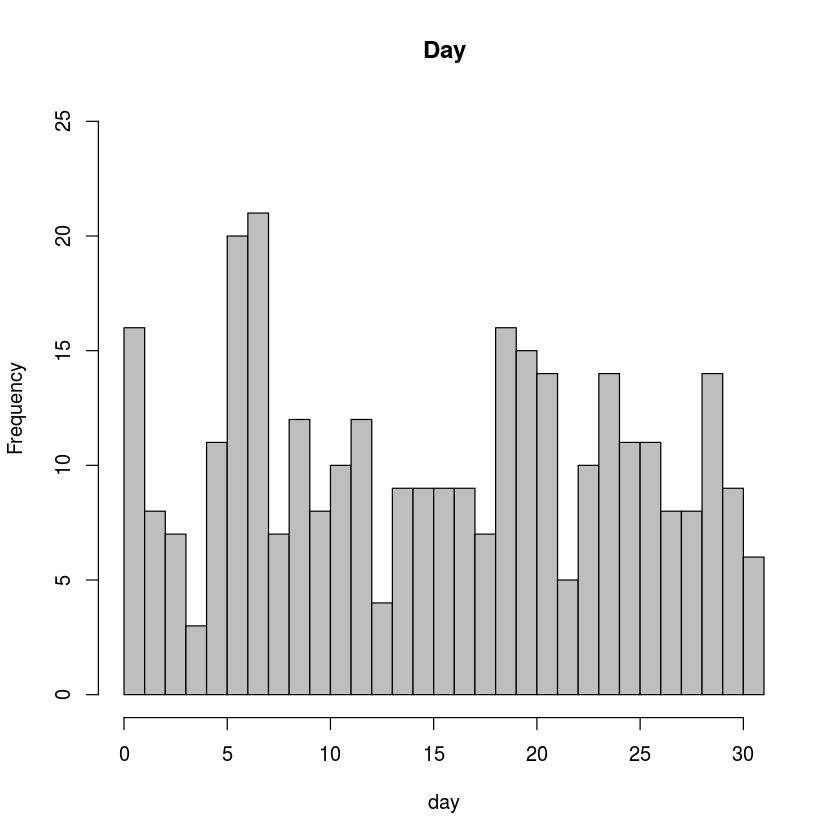

In [73]:
#Day
day <- str_sub(mass$Date,9,10)
day <- as.numeric(day)
days <- c(0:31)
hist(day, 
     col = "grey", 
     main = "Day", 
     ylim = c(0, 25),
     breaks=days)

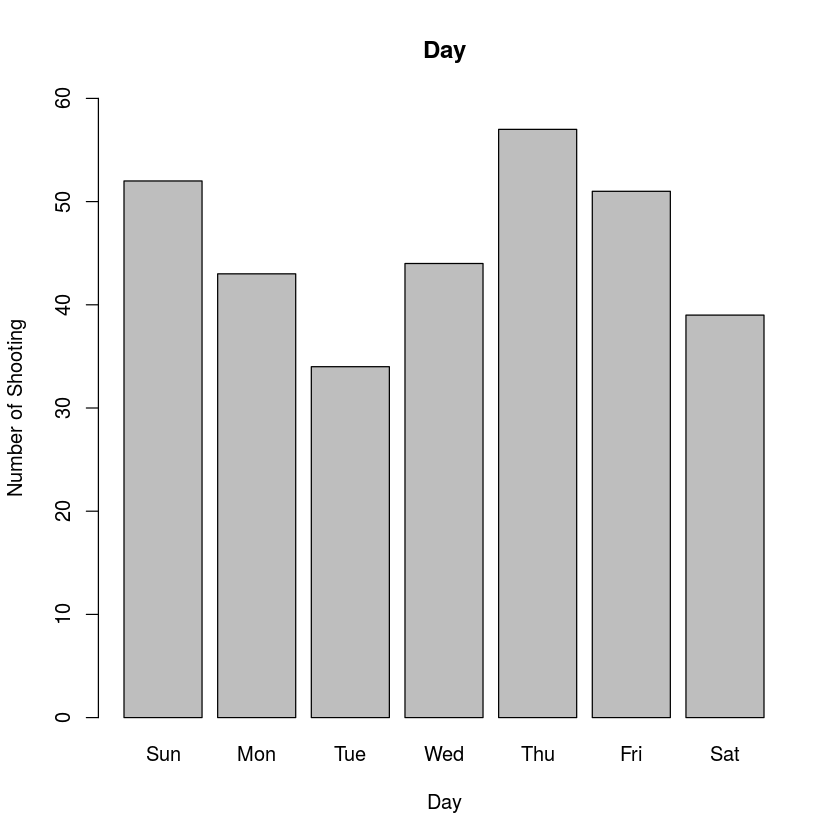

In [74]:
#Day of the week
weekday <- as.Date(betterDates)
freqs <- aggregate(weekday ~ wday, FUN=length)
barplot(freqs$weekday,
        main = "Day",
        ylab = "Number of Shooting", 
        xlab = "Day",
        ylim=c(0,60),
        names.arg = c("Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"))

- These four histograms show that mass shooting in the USA has increased since 1966. With 2015 and 2016 having the most shooting in the past 50 years. However, it would appear that this is an incomplete dataset as this dataset reports 7 mass shooting this year. However, there has been 270 in 2017 so far. (https://www.massshootingtracker.org/data)
- The next histogram looks at each month from this it would appear that February followed by March have had the most mass shooting in the past 51 years. Although, it would appear that there is less shooting in the summer months. 
- This histogram shows that there is no particular day that mass shooting is likely to occur. 
- The final barplot looks at what day of the week mass shooting in America are most likely to occur. Thursday seems to have the most mass shooting. Whereas, Tuesdays seems to have the least number of incident.
- In summary, this data would suggest that mass shooting are likely to increase in the future and February and March seem to be the most common months for the mass shooting to occur. Unfortunately, it would not appear that any particular day of the month is most common for a mass shooting. However, when looking at the day of the week it would appear that Thursday, Friday and Sunday are the most common days for a mass shooting to take place.

# Characteristic of the crime

Firstly, what sex is most likely to carry out mass murder?

In [75]:
Gender <- factor(mass$Gender)

In [76]:
Gender <- fct_collapse(Gender,
                  "Male"=c("M","Male"),
                  "Male/Female"=c("M/F","Male/Female"),
                  "Unknown"="Unknown",
                  "Female"="Female")

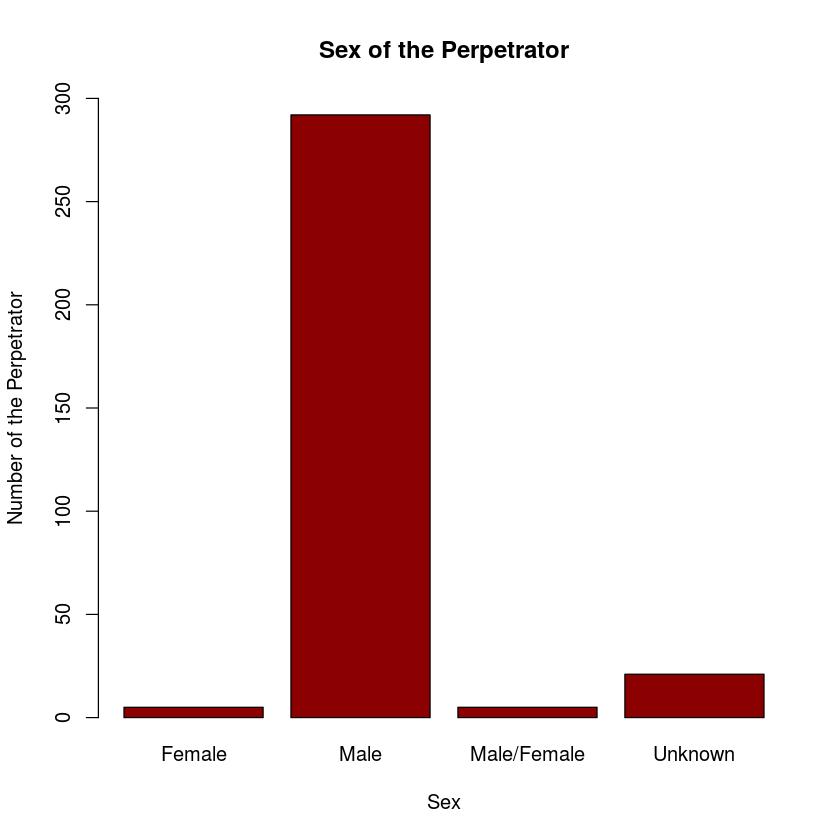

In [77]:
plot(Gender,
     main = "Sex of the Perpetrator",
    ylab = "Number of the Perpetrator",
    xlab = "Sex",
    col = "dark red",
    ylim = c(0,300))

This plot shows that males are the most likely to commit mass murder.

Next, how many fatalities were there and what is the relationship over the past 50 years?

In [78]:
sum(mass$Fatalities)

[1] 1433

In [79]:
mean(mass$Fatalities)

[1] 4.436533

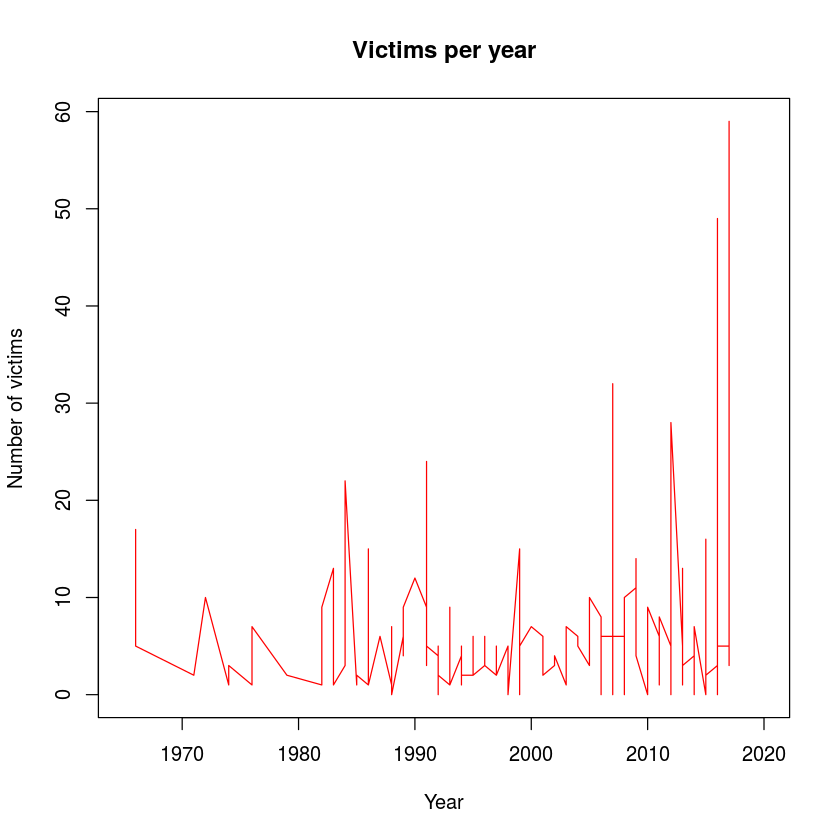

In [80]:
plot(year, mass$Fatalities,
     type= "l",
    main = "Victims per year",
    xlab = "Year",
    ylab = "Number of victims",
    xlim = c(1965, 2020),
    col = "red")

In [81]:
sum(mass$Injured)

[1] 1995

In [82]:
mean(mass$Injured)

[1] 6.176471

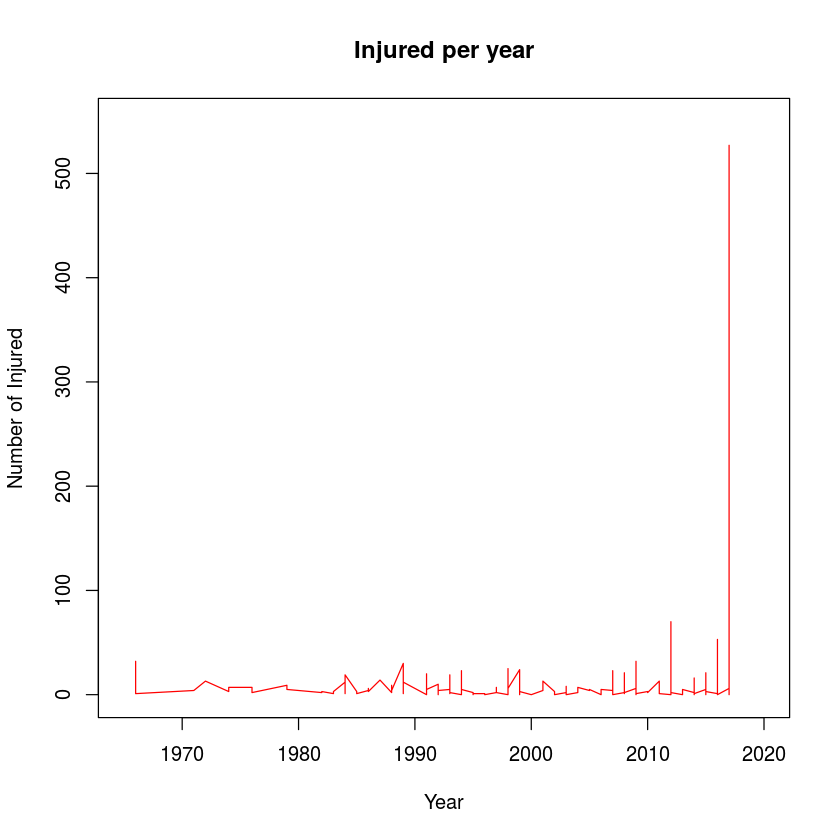

In [83]:
plot(year, mass$Injured,
     type= "l",
    main = "Injured per year",
    xlab = "Year",
    ylab = "Number of Injured",
    xlim = c(1965, 2020),
    ylim = c(0, 550),
    col = "red")

- This data shows that males are the most likely to commit mass murder, compared to females or male/female preparators.
- Looking at the victims and those that were injured.
- Over the 51 years, 1433 people were killed in this kind of attack, the average number of people killed per attack is 4.4. 
- The number of people injured with 1995 people with the average number of 6.2 people injured per attack. 
- The data from the plot shows a sharp in an increase in the number of victims killed and the number of people injured has massively increased in recent years.

# Location where mass shooting have taken place

In [118]:
l <- sub('.*,\\s*','\\1', mass$Location)
l[l==""] <- NA
l <- na.omit(l)
l <- as.factor(l) 
k <- fct_collapse(l,
                   "Alabama" = c("Alabama", "AL"),
                   "Alaska" = "Alaska",
                   "Arizona" = c("Arizona", "AZ"),
                   "Arkansas" = "Arkansas",
                   "California" = c("California", "LA", "CA"),
                   "Colorado" = c("Colorado", "CO"),
                   "Connecticut" = "Connecticut",
                   "Delaware" = "DE",
                   "Florida" = c("Florida", "FL"),
                   "Georgia" = c("Georgia", "GA"),
                   "Hawaii" = "Hawaii",
                   "Idaho" = "Idaho",
                   "Illinois" = "Illinois",
                   "Indiana" = "Indiana",
                   "Iowa" = "Iowa",
                   "Kansas" = "Kansas",
                   "Kentucky" = "Kentucky",
                   "Louisiana" = "Louisiana",
                   "Maryland" = "MD",
                   "Maine" = "Maine",
                   "Massachusetts" = "Massachusetts",
                   "Michigan" = "Michigan",
                   "Minnesota" = "Minnesota",
                   "Mississippi" = "Mississippi",
                   "Missouri" = "Missouri",
                   "Montana" = "Montana",
                   "Nebraska" = "Nebraska",
                   "Nevada" = c("Nevada", "NV"),
                   "New Jersey" = c("New Jersey", "NJ"),
                   "New Mexico" = c("New Mexico", "NM"),
                   "New York" = "New York",
                   "North Carolina" = "North Carolina",
                   "Ohio" = "Ohio",
                   "Oklahoma" = "Oklahoma",
                   "Oregon" = "Oregon",
                   "Pennsylvania" = c("Pennsylvania","PA"),
                   "South Carolina" = "South Carolina",
                   "South Dakota" = "South Dakota",
                   "Tennessee" = "Tennessee",
                   "Texas" = c("Texas","Texas ", "TX", "TN"),
                   "Utah" = "Utah",
                   "Vermont" = "Vermont",
                   "Virginia" = c("Virginia", "VA"),
                   "Washington" = c("Washington", "WA"),
                   "West Virginia" = "West Virginia",
                   "Wisconsin" = "Wisconsin",
                   "Wyoming" = "Wyoming")

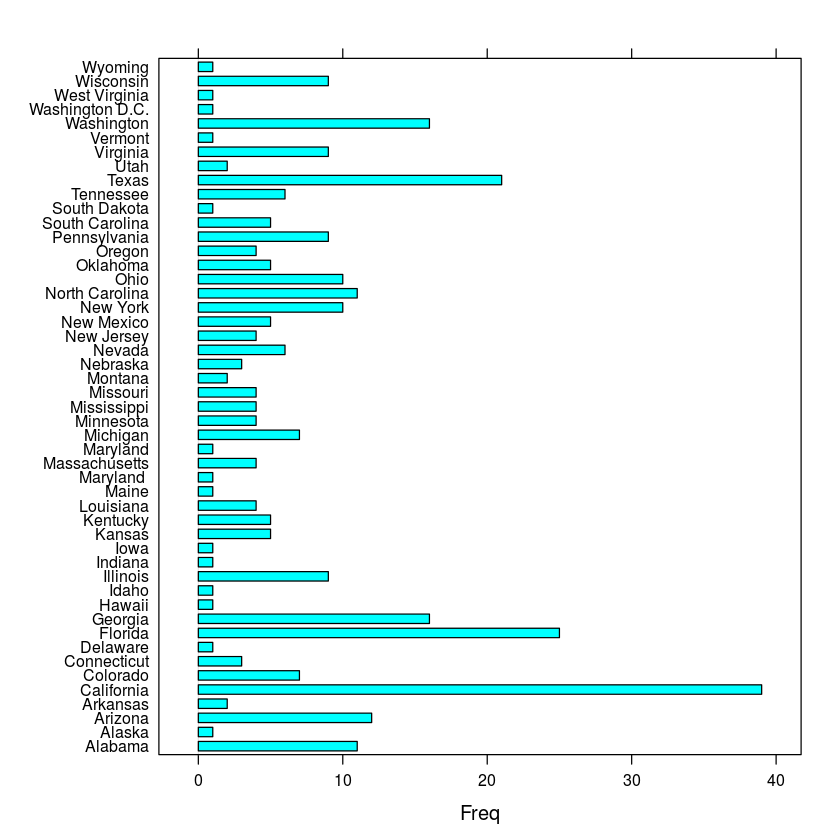

In [119]:
barchart(k)

# Race of the Perpetrator

In [87]:
Race <- as.factor(mass$Race)

In [88]:
Race <- fct_collapse(Race,
                     "Asian" = c("Asian", "Asian American", "Asian American/Some other race"),
                     "Black" = c("Black", "black", "Black American or African American", "Black American or African American/Unknown"),
                     "Latino" = "Latino",
                     "Native" = "Native American or Alaska Native",
                     "Other" = c("Other", "Some other race", "Unknown", "Two or more races", ""),
                     "White" = c("White", "white", "White American or European American", "White American or European American/Some other Race"))
    

Warning message:
“Unknown levels in `f`: ”

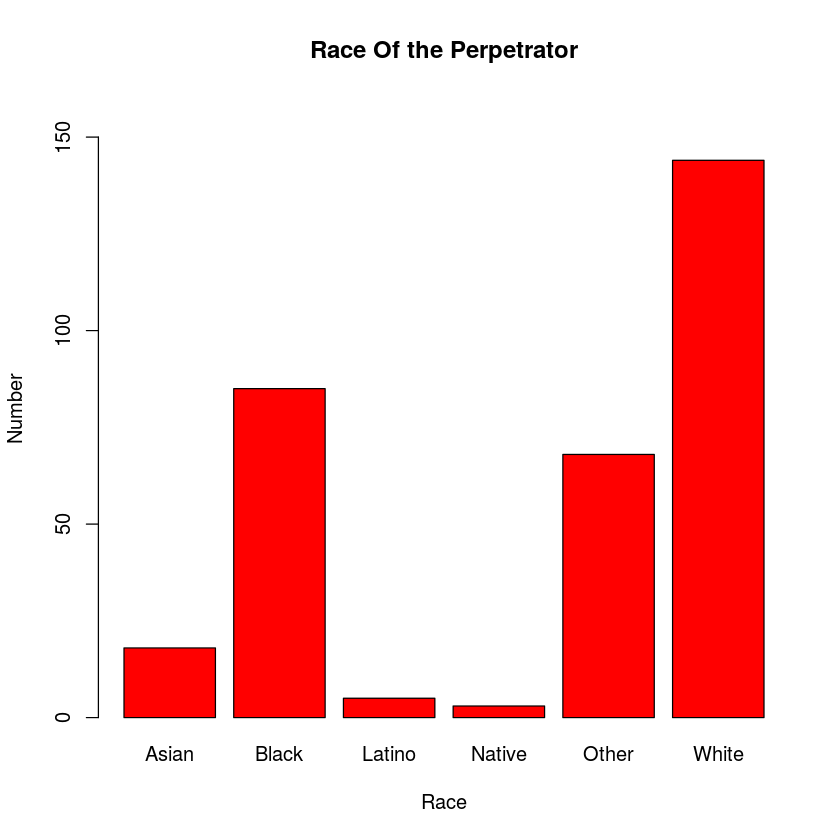

In [89]:
plot(Race,
    main = "Race Of the Perpetrator",
    xlab = "Race",
    ylab = "Number",
    ylim = c(0, 160),
    col = "red")

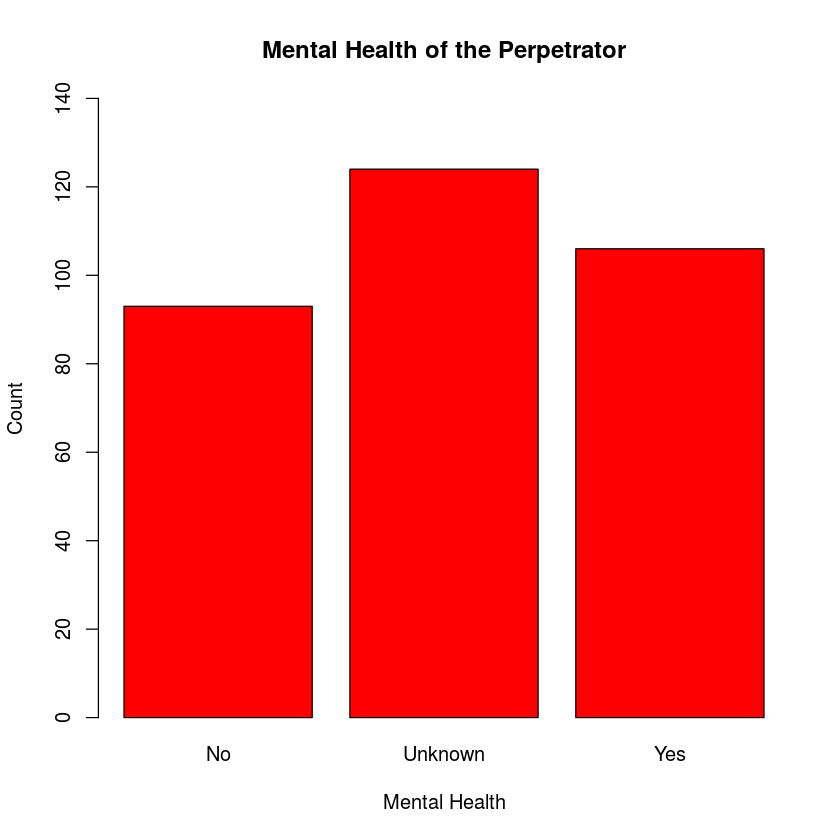

In [90]:
mass$Mental.Health <- as.factor(mass$Mental.Health.Issues)

mass$Mental.Health <- fct_collapse(mass$Mental.Health, 
                                   "No" = "No",
                                   "Unknown" = c("Unclear", "Unknown", "unknown"),
                                   "Yes" = "Yes")

plot(mass$Mental.Health,
    main = "Mental Health of the Perpetrator",
    ylim = c(0, 140),
    xlab = "Mental Health",
    ylab = "Count",
    col = "red")

# Target

In [176]:
t1<- fct_collapse(mass$Target,
                "Basketball players" = "basketball players",
                "Birthday party bus" = "birthday party Bus",
                "Black men" = "black men",
                "Club members" = "club members",
                "Congresswoman" ="Congresswoman",
                "Contestant" = "Contestant",
                "Coworkers" = c("Ex-Coworkers", "coworkers", "Coworkers", "Coworkers", "Family"),
                "Drug dealer" = "drug dealer",
                "Employees" = c("postmaster", "lawyers", "psychologist+psychiatrist", "Social Workers", "TSA Officer", "welding shop employees"),
                "Ex-girlfriend" = c("Ex-girlfriend", "Ex-Girlfriend", "Ex-GirlFriend", "Ex-Girlfriend & Family", "Ex-Girlfriend+random"),
                "Ex-Wife" = c("Ex-Wife", "Ex-Wife & Family"),
                "Family" = c("Family", "Family/Neighbors", "Family+random", "Family+students"),
                "Friends" = "Friends",
                "Girlfriend" = "Girlfriend",
                "House Owner" = c("House Owner", "House Owner"),
                "hunters" = "hunters",
                "Marines" = "Marines",
                "Monks" = "Monks",
                "Neighbors" = "Neighbors",
                "Partners family" = "Partners family",
                "Party guests" = "Party guests",
                "Police" = c("Policeman", "Trooper", "police", "Policeman+Council Member"),
                "Prayer group" = "Prayer group",
                "Protestors" = "Protestors",
                "Random" = c("Random", "random", ""),
                "Rapper" = "rapper+random",
                "Sikhs" = "Sikhs",
                "School" = c("Students", "Children", "Teachers", "Students+Parents", "Students+Teachers", "school girls"),
                "Uninvited guests" = "Uninvited guests",
                "Women" = "women")


Warning message:
“Unknown levels in `f`: birthday party Bus, Monks, Neighbors, Partners family, Party guests, Prayer group, Protestors, Random, Uninvited guests”

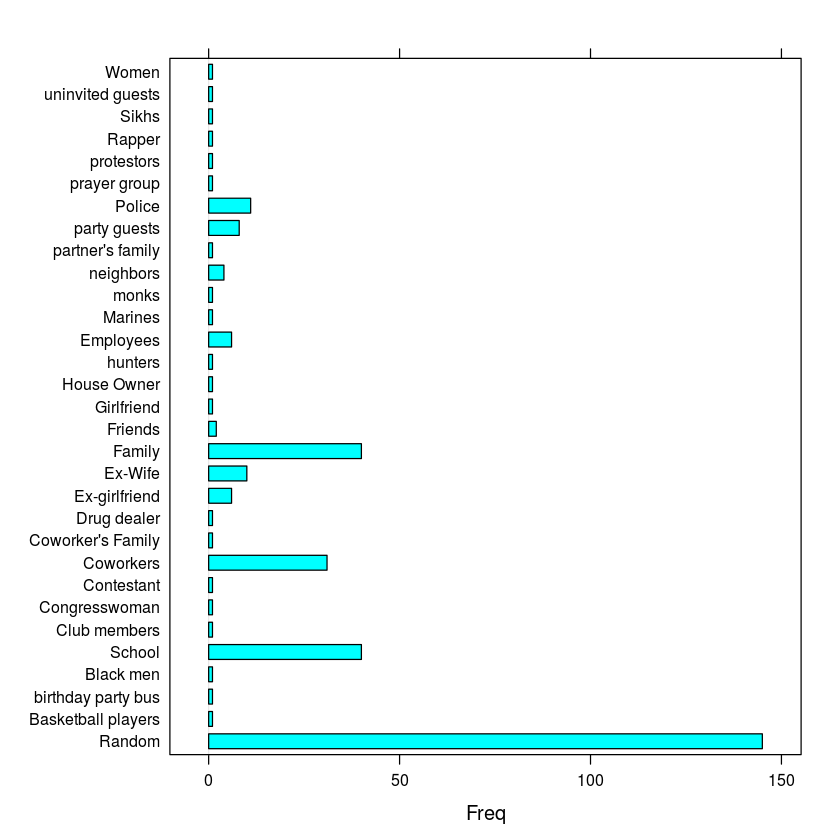

In [177]:
barchart(t1)

# Limitation

- One of the limitations of this dataset is there is a substantial amount of data missing. This website (https://www.massshootingtracker.org/data) that tracks shooting in America, states that there has been over 1800 mass shooting since 2013. Whereas, this dataset used only accounts for 323 mass shooting over the 51 years.

# Conclusion

In conclusion, This data demonstrates a vast problem with gun violence in America that is only likely to get worst each year. However, one of the issues with this dataset is not all mass shooting have been account for limiting the amount of information that can be taken into account.